In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import face_recognition
import os

### 얼굴형태만 추출

In [2]:
image_path = os.getenv('HOME')+'/face_embedding/images'
img1_path = os.path.join(image_path, 'yb1.jpg')
img2_path = os.path.join(image_path, 'yb0.jpg')

image1 = face_recognition.load_image_file(img1_path)
image2 = face_recognition.load_image_file(img2_path)

img1_face_locations = face_recognition.face_locations(image1)
img2_face_locations = face_recognition.face_locations(image2)

print("Image 1의 얼굴 영역 좌표 : ", img1_face_locations)
print("Image 2의 얼굴 영역 좌표 : ", img2_face_locations)

Image 1의 얼굴 영역 좌표 :  [(348, 553, 811, 91)]
Image 2의 얼굴 영역 좌표 :  [(50, 84, 94, 40)]


In [3]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c, d:b, :]
    return cropped_face

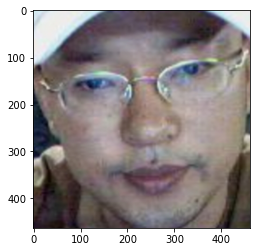

In [4]:
cropped_face1 = get_cropped_face(img1_path)
plt.imshow(cropped_face1)

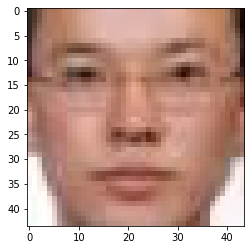

In [5]:
cropped_face2 = get_cropped_face(img2_path)
plt.imshow(cropped_face2)

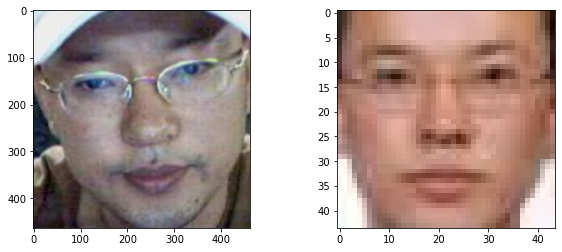

In [6]:
plt.figure(figsize=(10, 4))

ax1 = plt.subplot(1, 2, 1)
ax1 = plt.imshow(cropped_face1)
ax2 = plt.subplot(1, 2, 2)
ax2 = plt.imshow(cropped_face2)

plt.show()

### 얼굴의 닮음정도 수치화(거리계산)

In [7]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [8]:
embedding1 = get_face_embedding(cropped_face1)
embedding2 = get_face_embedding(cropped_face2)

In [9]:
distances = np.linalg.norm(embedding1[0] - embedding2[0])
print(distances)

0.44351758003028285


### 연예인 얼굴 불러와서 임베딩 딕트로 저장

In [10]:

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        image_path = os.path.join(dir_path, file)
        try:
            face = get_cropped_face(image_path)
            embedding = get_face_embedding(face)
            if len(embedding) > 0:
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        except:
            pass
    return embedding_dict

In [11]:
dir_path = os.getenv('HOME')+'/face_embedding/celebrity'#os.path.dirname(os.path.abspath('__file__')) + r'/face_embedding/celebrity'
embedding_dict = get_face_embedding_dict(dir_path)



###  연예인과 비교   5순위까지

In [12]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [13]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [14]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [18]:
embedding_dict['yb1'] = embedding2[0]

In [16]:

sorted_faces, key = get_nearest_face('yb1', 5)

순위 1 : 이름(yb0), 거리(0.44351758003028285)
순위 2 : 이름(봉준호), 거리(0.45962189062735603)
순위 3 : 이름(돈스파이크), 거리(0.48104450876376814)
순위 4 : 이름(박휘순), 거리(0.4989065246676752)
순위 5 : 이름(박성호), 거리(0.507216918633894)


TypeError: cannot unpack non-iterable NoneType object

In [17]:
get_nearest_face('yb0')

순위 1 : 이름(슈퍼비), 거리(0.43810885127757765)
순위 2 : 이름(박휘순), 거리(0.4399125377604874)
순위 3 : 이름(yb1), 거리(0.44351758003028285)
순위 4 : 이름(개코), 거리(0.45624407438511855)
순위 5 : 이름(정수빈), 거리(0.4563591994663742)


### 얼굴찾아보기

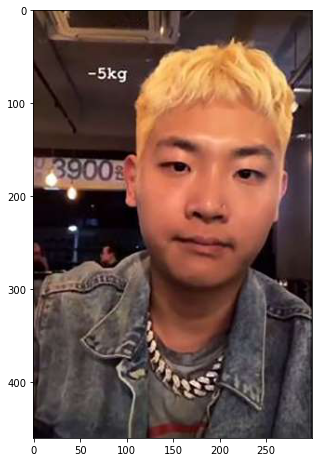

In [19]:
import matplotlib.image as img

plt.figure(figsize=(5, 10))
file_path = dir_path + r'/슈퍼비.jpeg'
ndarray = img.imread(file_path)
plt.imshow(ndarray)